Welcome to JupyROOT 6.28/10
/project/6049244/data/MATHUSLA/simulation/run-2024-07-cosmic-muon/DigiOutput/cosmic_run_48/0/stat0.pkl
28.7241672792417


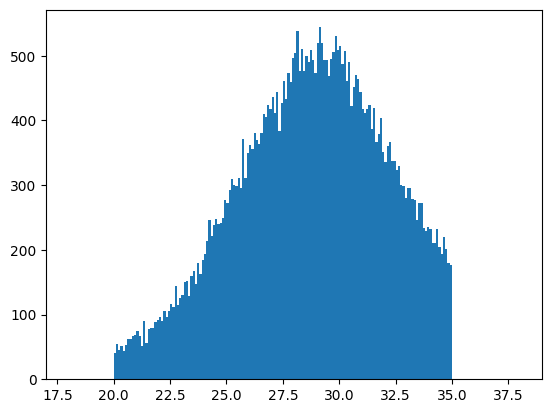

/project/6049244/data/MATHUSLA/simulation/run-2024-07-cosmic-muon/DigiOutput/cosmic_run_17/0/stat0.pkl
28.724590096532157


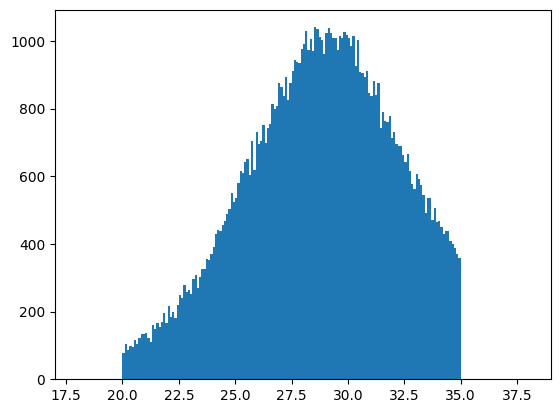

/project/6049244/data/MATHUSLA/simulation/run-2024-07-cosmic-muon/DigiOutput/cosmic_run_93/0/stat0.pkl
28.735538496738204


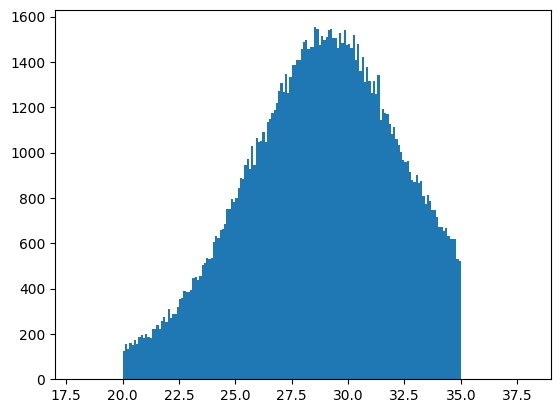

In [1]:
# IMPORT
# Standard libray
import sys, os
from importlib import reload
# sys.path.append("..")
import collections
import joblib


# Common library
from tqdm import tqdm
import numpy as np
import scipy
from pylab import *
import scipy.interpolate
import argparse
import matplotlib


# ROOT>....
import ROOT

# parser = argparse.ArgumentParser(
#                     prog='Velocity Check',
#                     description='Gets velocity of tracks from track reconstruction pickle files',
#                     epilog='MATHUSLA 2024'
# )
# parser.add_argument('directory_name')
# args=parser.parse_args()
# rootdir = args.directory_name
root_dir = "/project/6049244/data/MATHUSLA/simulation/run-2024-07-cosmic-muon/DigiOutput"
velocities = []
filecount = 0
for subdir,dirs,files in os.walk(root_dir):
    for file in files:
        filename = str(os.path.join(subdir,file))
        if filename[-4:]==".pkl" and filecount < 3:
            print(filename)
            data = joblib.load(filename)
            for ievent in range(len(data['tracks'])):
                # print(data['tracks'][ievent])
                if data['tracks'][ievent] != []:
                    hits = data['tracks'][ievent][0].hits
                    # print(hits)
                    # if (len(hits)<7) and (len(hits)>4):
                    if len(hits) > 0:
                        # print(data['tracks'][ievent][0])
                        coords = data['tracks'][ievent][0]
                        # print(coords)
                        Ax,Ay,Az,At = coords.Ax,coords.Ay,coords.Az,coords.At
                        # print(Ax,Ay,Az,At)
                        vx = Ax/At
                        vy = Ay/At
                        vz = Az/At
                        v = np.sqrt(np.square(vx)+np.square(vy)+np.square(vz))
                        velocities.append(v)
            # print(velocities)
            print(np.mean(velocities))
            h = matplotlib.pyplot.hist(velocities,bins=200,range=[18,38])
            matplotlib.pyplot.savefig("/home/ay1137/projects/rrg-mdiamond/ay1137/"+str(filecount)+"velocities_hist.png")
            matplotlib.pyplot.show()
            filecount += 1

[1491.52950831   29.18853457    3.83842072]


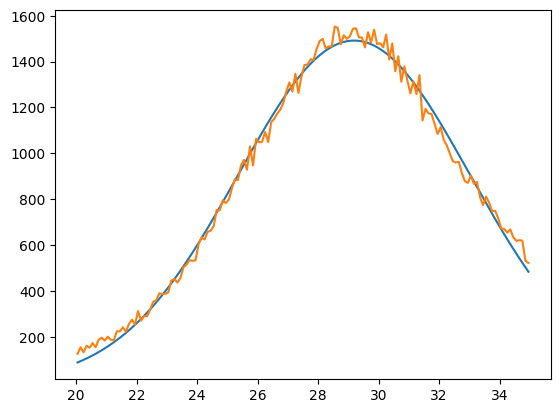

In [6]:
from scipy.optimize import curve_fit

def gauss(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

xdata = 0.5*(h[1][:-1]+h[1][1:])
ydata = h[0]
fit_range = [20,35]
mask=(xdata>=fit_range[0])&(xdata<=fit_range[1])
xdata=xdata[mask]
ydata=ydata[mask]
# sigma=np.sqrt(ydata)
popt,pcov = curve_fit(gauss,xdata,ydata,p0=[max(velocities),np.mean(velocities),5])
print(popt)
plot(xdata,gauss(xdata,popt[0],popt[1],popt[2]))
plot(xdata,ydata)